**Working** **with** **InceptionV3** **on** **MURA** **Dataset** **for** **Validation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Creating** **Training** **Dataset**

In [ ]:
# Check and display the number of images in train-dataset.
train_image_data_dir = "/content/drive/MyDrive/FracAtlas/train-img/train/"
train_image_data_dir = pathlib.Path(train_image_data_dir) #pathlib.path is used to join paths
train_image_count = len(list(train_image_data_dir.glob('*/*.jpg')))
train_image_count_fractured = len(list(train_image_data_dir.glob('Fractured/*')))
train_image_count_non_fractured = len(list(train_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(train_image_count))
print("fractured = "+str(train_image_count_fractured))
print("non-fractured = "+str(train_image_count_non_fractured))

Total = 3267
fractured = 574
non-fractured = 2693


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(train_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(train_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",name))
    print(name)

100%|██████████| 574/574 [00:11<00:00, 49.71it/s] 


**Creating** **validation** **Dataset**

In [ ]:
# Check and display the number of images in valid-dataset.
valid_image_data_dir = "/content/drive/MyDrive/FracAtlas/valid-img/valid/"
valid_image_data_dir = pathlib.Path(valid_image_data_dir)
valid_image_count = len(list(valid_image_data_dir.glob('*/*.jpg')))
valid_image_count_fractured = len(list(valid_image_data_dir.glob('Fractured/*')))
Valid_image_count_non_fractured = len(list(valid_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(valid_image_count))
print("fractured = "+str(valid_image_count_fractured))
print("non-fractured = "+str(Valid_image_count_non_fractured))

Total = 469
fractured = 82
non-fractured = 387


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(valid_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",name))
    print(name)

100%|██████████| 82/82 [00:43<00:00,  1.88it/s]


**Creating** **Testing** **Dataset**

In [ ]:
# mura dataset

# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/MURA/test/XR_ELBOW/"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.png')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 465
fractured = 230
non-fractured = 235


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",name))
    print(name)

100%|██████████| 230/230 [00:03<00:00, 57.95it/s] 


**Testing** **dataset** **for** **bone** **fracture** **images**

In [ ]:
# bone fracture dataset

# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.jpg')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 399
fractured = 200
non-fractured = 201


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",name))
    print(name)

100%|██████████| 200/200 [00:05<00:00, 39.34it/s] 


**Defining** **Image** **Size**

In [ ]:
# Define the basic parameter, e.g., Batch Size, Image Size.
batch_size = 32 #refers to the number of training examples utilize in one iteration
img_height = 224
img_width = 224

**Training** **Dataset**

In [ ]:
# Define to use 100% of the images for training.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_image_data_dir,
  #validation_split=0.2,
  #subset="training",
  seed=123, #works same as random state
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True, #This parameter indicates whether to crop the images to match the specified aspect ratio
  batch_size=batch_size)

Found 3267 files belonging to 2 classes.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = train_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


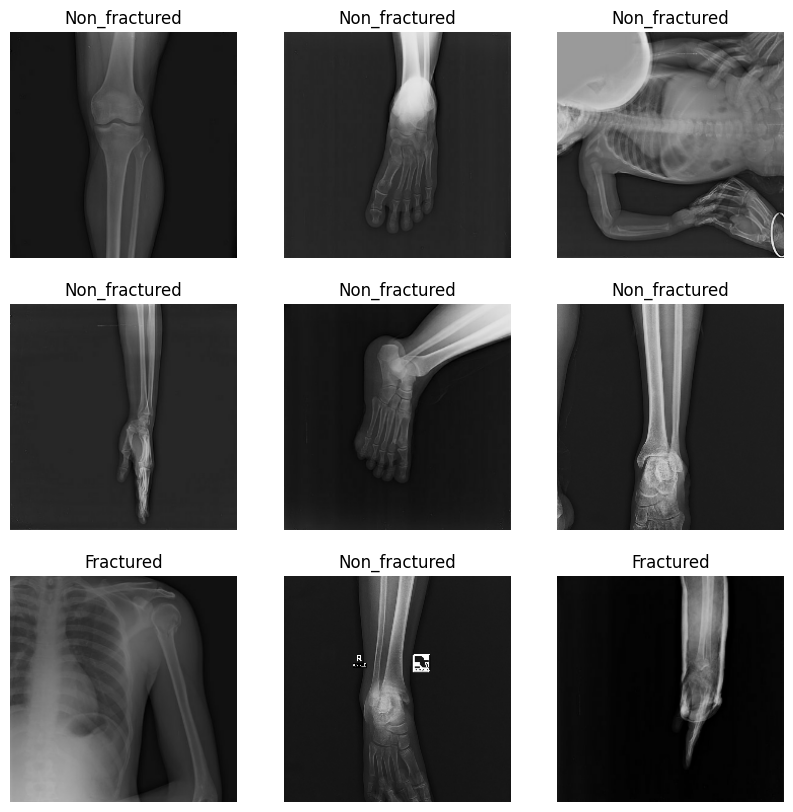

In [ ]:
# Display some sample images from the training images dataset.
plt.figure(figsize=(10, 10))
if not train_ds:
  print("The train_ds dataset is empty.")
else:
  for images, labels in train_ds.take(1): #take(1) method is used to take only one batch of images and labels
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1) #3, 3, i + 1 parameters specify that there will be a 3x3 grid, and i + 1 indicates the position of the current subplot in the grid
      plt.imshow(images[i].numpy().astype("uint8")) #astype("uint8") is used to ensure the image is treated as an 8-bit unsigned integer before displaying
      plt.title(class_names[np.argmax(labels[i])])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Validation** **Dataset**

In [ ]:
# Define to use 100% of the images for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 469 files belonging to 2 classes.


In [ ]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = val_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


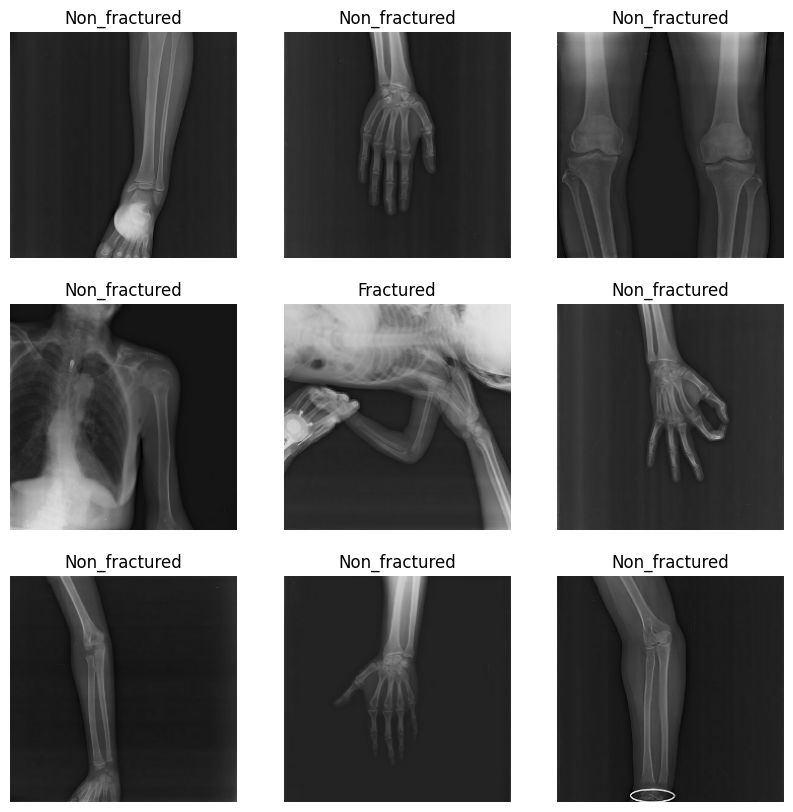

In [ ]:
# Display some sample images from the validation images dataset.
plt.figure(figsize=(10, 10))
if not val_ds:
  print("The val_ds dataset is empty.")
else:
  for images, labels in val_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(labels[i])])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Testing** **Dataset**

In [ ]:
# Define to use 100% of the images for validation.

# mura dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 465 files belonging to 2 classes.


In [ ]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = test_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


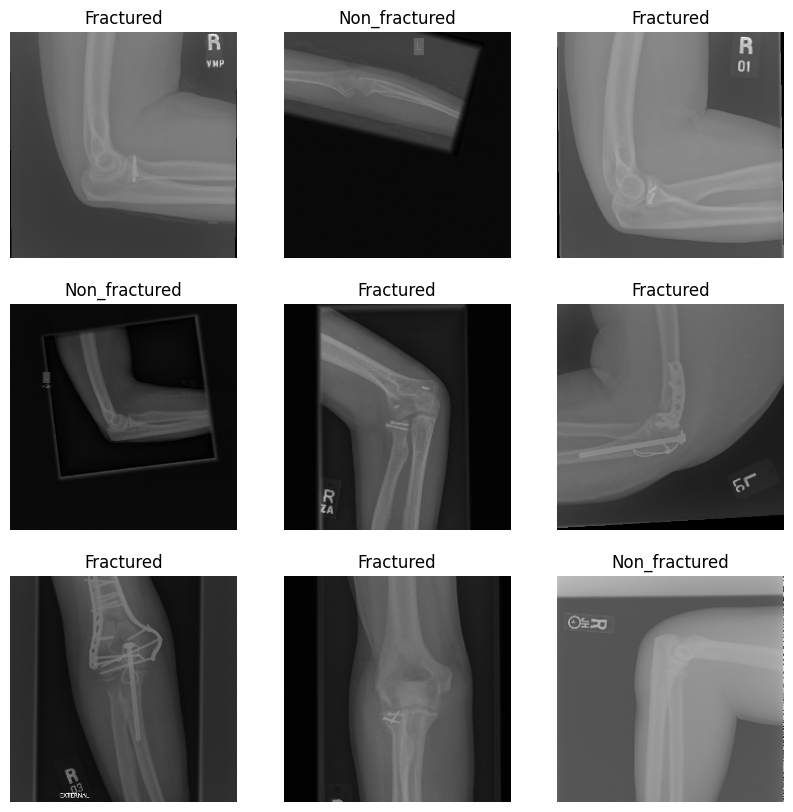

In [ ]:
# Display some sample images from the test_ds images dataset.
plt.figure(figsize=(10, 10))
if not test_ds:
  print("The test_ds dataset is empty.")
else:
  for images, labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(labels[i])])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Testing** **dataset** **of** **Bone** **Fracture** **images**

In [ ]:
# Define to use 100% of the images for validation.

# bone fracture dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 399 files belonging to 2 classes.


In [ ]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [ ]:
# Display the name of classes.
class_names = test_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


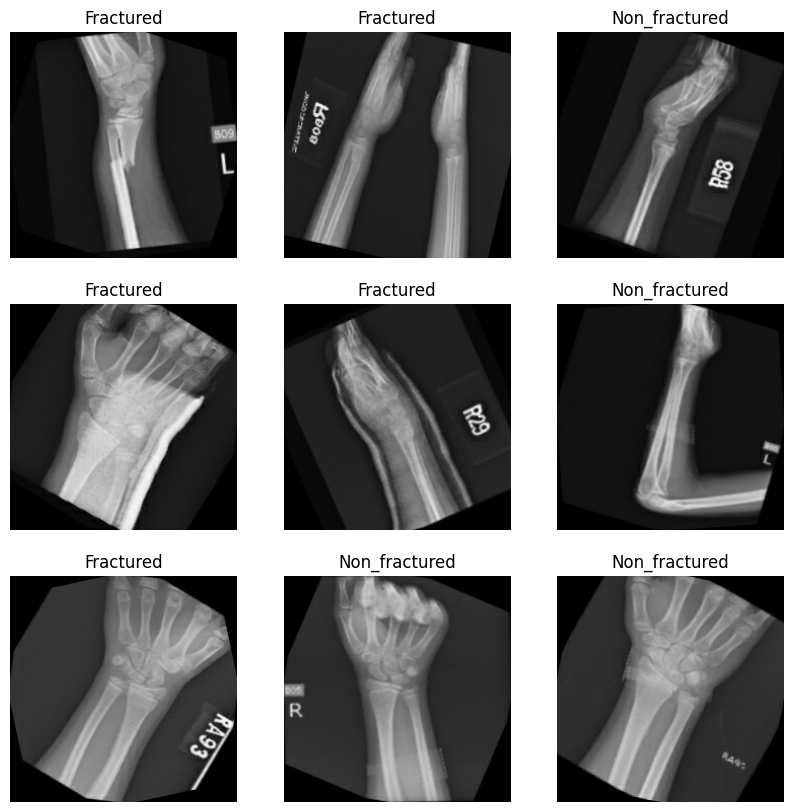

In [ ]:
# Display some sample images from the test_ds images dataset.
plt.figure(figsize=(10, 10))
if not test_ds:
  print("The test_ds dataset is empty.")
else:
  for images, labels in test_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[np.argmax(labels[i])])
      plt.axis("off")

In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


**Configure** **the** **dataset** **for** **performance**

In [ ]:
#optimization algorithm
AUTOTUNE = tf.data.AUTOTUNE
#tf.data.AUTOTUNE , which will prompt the tf.data runtime to tune the value dynamically at runtime.
#tf.data builds a performance model of the input pipeline and runs an optimization algorithm to find a good allocation of its CPU budget across all parameters specified as AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Importing** **Functions** **To** **Implement** **Model**

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os

import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.layers import BatchNormalization, concatenate
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.4 MB/s eta 0:00:00


**Implementing** **Model**

In [ ]:
precision_m = tf.keras.metrics.Precision()

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

In [ ]:
#model for weight=imagenet

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Create InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1000, activation='relu')(x) #hidden layer=1000
predictions = Dense(2, activation='softmax')(x) #ouput layer=2

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

#declaring learning rate and its changes
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100, #learning rate decay after 100 steps
    decay_rate=0.90, #learning rate decays 90%
    staircase=True)

# Compile the model (you can adjust the optimizer and loss function)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

# Display the model summary
model.summary()

87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

In [ ]:
# Start model training with Dropout using validation set
epochs = 3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
109/109 [==============================] - 109s 366ms/step - loss: 0.4905 - accuracy: 0.8203 - precision: 0.8204 - recall: 0.8204 - f1: 0.8204 - val_loss: 0.6246 - val_accuracy: 0.8252 - val_precision: 0.8280 - val_recall: 0.8280 - val_f1: 0.8280
Epoch 2/3
109/109 [==============================] - 26s 240ms/step - loss: 0.4376 - accuracy: 0.8292 - precision: 0.8292 - recall: 0.8292 - f1: 0.8292 - val_loss: 0.6908 - val_accuracy: 0.7249 - val_precision: 0.7216 - val_recall: 0.7216 - val_f1: 0.7216
Epoch 3/3
109/109 [==============================] - 25s 233ms/step - loss: 0.3871 - accuracy: 0.8531 - precision: 0.8531 - recall: 0.8531 - f1: 0.8531 - val_loss: 0.3931 - val_accuracy: 0.8443 - val_precision: 0.8479 - val_recall: 0.8479 - val_f1: 0.8479


In [ ]:
# Start model training with Dropout using validation set
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
109/109 [==============================] - 25s 230ms/step - loss: 0.3631 - accuracy: 0.8577 - precision: 0.8577 - recall: 0.8577 - f1: 0.8577 - val_loss: 0.5179 - val_accuracy: 0.8081 - val_precision: 0.8101 - val_recall: 0.8101 - val_f1: 0.8101
Epoch 2/100
109/109 [==============================] - 26s 237ms/step - loss: 0.3155 - accuracy: 0.8760 - precision: 0.8761 - recall: 0.8761 - f1: 0.8761 - val_loss: 0.3894 - val_accuracy: 0.8507 - val_precision: 0.8505 - val_recall: 0.8505 - val_f1: 0.8505
Epoch 3/100
109/109 [==============================] - 25s 230ms/step - loss: 0.2786 - accuracy: 0.8855 - precision: 0.8856 - recall: 0.8856 - f1: 0.8856 - val_loss: 0.7039 - val_accuracy: 0.8294 - val_precision: 0.8321 - val_recall: 0.8321 - val_f1: 0.8321
Epoch 4/100
109/109 [==============================] - 26s 238ms/step - loss: 0.2478 - accuracy: 0.9024 - precision: 0.9024 - recall: 0.9024 - f1: 0.9024 - val_loss: 0.4491 - val_accuracy: 0.8571 - val_precision: 0.8592 - val_

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

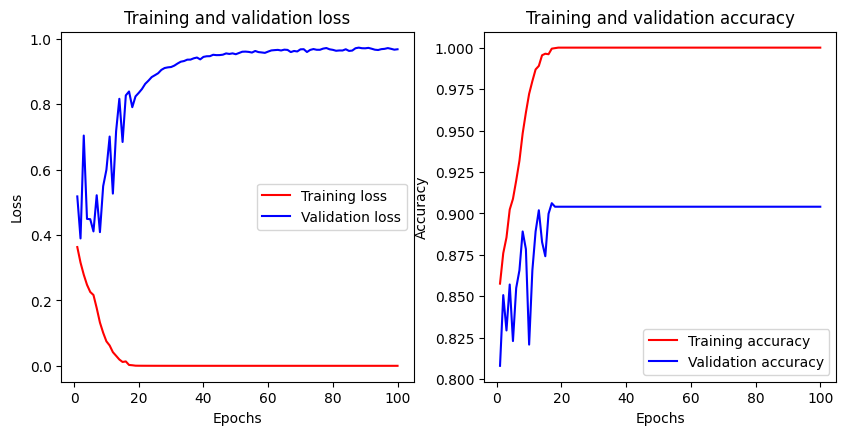

In [ ]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'b',label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,acc,'r',label='Training accuracy')
ax2.plot(epochs,val_acc,'b',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


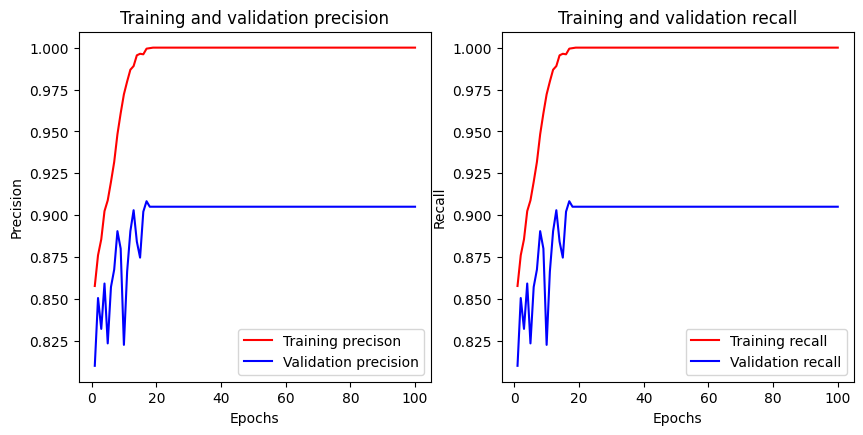

In [ ]:
import matplotlib.pyplot as plt
pre=history_dict['precision']
val_pre=history_dict['val_precision']
rec=history_dict['recall']
val_rec=history_dict['val_recall']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,pre,'r',label='Training precison')
ax1.plot(epochs,val_pre,'b',label='Validation precision')
ax1.set_title('Training and validation precision')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Precision')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,rec,'r',label='Training recall')
ax2.plot(epochs,val_rec,'b',label='Validation recall')
ax2.set_title('Training and validation recall')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Recall')
ax2.legend()

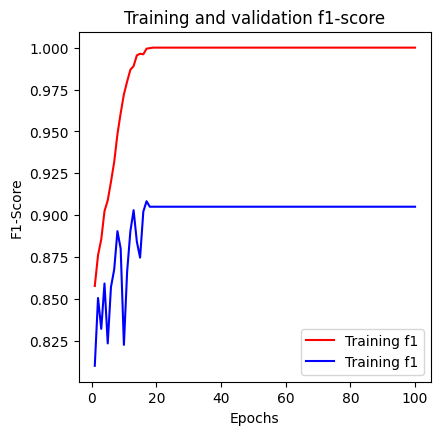

In [ ]:
import matplotlib.pyplot as plt
f1=history_dict['f1']
val_f1=history_dict['val_f1']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,f1,'r',label='Training f1')
ax1.plot(epochs,val_f1,'b',label='Training f1')
ax1.set_title('Training and validation f1-score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1-Score')
ax1.legend()

In [ ]:
# mura dataset

model.evaluate(test_ds)

16/16 [==============================] - 6s 297ms/step - loss: 3.2370 - accuracy: 0.5419 - precision: 0.5458 - recall: 0.5458 - f1: 0.5458


[3.2369794845581055,
 0.5419355034828186,
 0.5458333492279053,
 0.5458333492279053,
 0.5458333492279053]

In [ ]:
# bone fracture dataset

model.evaluate(test_ds)

14/14 [==============================] - 4s 268ms/step - loss: 4.3408 - accuracy: 0.5414 - precision: 0.5587 - recall: 0.5587 - f1: 0.5587


[4.340812683105469,
 0.5413534045219421,
 0.5587301850318909,
 0.5587301850318909,
 0.5587301254272461]

In [ ]:
#model for weight=none

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Create InceptionV3 base model
base_model = InceptionV3(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1000, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

#declaring learning rate and its changes
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.90,
    staircase=True)

# Compile the model (you can adjust the optimizer and loss function)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

# Display the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [ ]:
# Start model training with Dropout using validation set
epochs = 3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
109/109 [==============================] - 103s 343ms/step - loss: 0.6387 - accuracy: 0.8038 - precision: 0.8038 - recall: 0.8038 - f1: 0.8038 - val_loss: 3.4402 - val_accuracy: 0.8252 - val_precision: 0.8243 - val_recall: 0.8243 - val_f1: 0.8243
Epoch 2/3
109/109 [==============================] - 25s 230ms/step - loss: 0.4676 - accuracy: 0.8225 - precision: 0.8225 - recall: 0.8225 - f1: 0.8225 - val_loss: 21.0268 - val_accuracy: 0.5672 - val_precision: 0.5698 - val_recall: 0.5698 - val_f1: 0.5698
Epoch 3/3
109/109 [==============================] - 26s 236ms/step - loss: 0.4344 - accuracy: 0.8246 - precision: 0.8246 - recall: 0.8246 - f1: 0.8246 - val_loss: 0.4669 - val_accuracy: 0.8252 - val_precision: 0.8243 - val_recall: 0.8243 - val_f1: 0.8243


In [ ]:
# Start model training with Dropout using validation set
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
109/109 [==============================] - 25s 232ms/step - loss: 0.4027 - accuracy: 0.8365 - precision: 0.8366 - recall: 0.8366 - f1: 0.8366 - val_loss: 0.4444 - val_accuracy: 0.8316 - val_precision: 0.8306 - val_recall: 0.8306 - val_f1: 0.8306
Epoch 2/100
109/109 [==============================] - 26s 234ms/step - loss: 0.3860 - accuracy: 0.8445 - precision: 0.8445 - recall: 0.8445 - f1: 0.8445 - val_loss: 0.4842 - val_accuracy: 0.7868 - val_precision: 0.7880 - val_recall: 0.7880 - val_f1: 0.7880
Epoch 3/100
109/109 [==============================] - 26s 235ms/step - loss: 0.3735 - accuracy: 0.8421 - precision: 0.8421 - recall: 0.8421 - f1: 0.8421 - val_loss: 0.4687 - val_accuracy: 0.7996 - val_precision: 0.7993 - val_recall: 0.7993 - val_f1: 0.7993
Epoch 4/100
109/109 [==============================] - 25s 234ms/step - loss: 0.3663 - accuracy: 0.8577 - precision: 0.8577 - recall: 0.8577 - f1: 0.8577 - val_loss: 0.3982 - val_accuracy: 0.8443 - val_precision: 0.8431 - val_

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

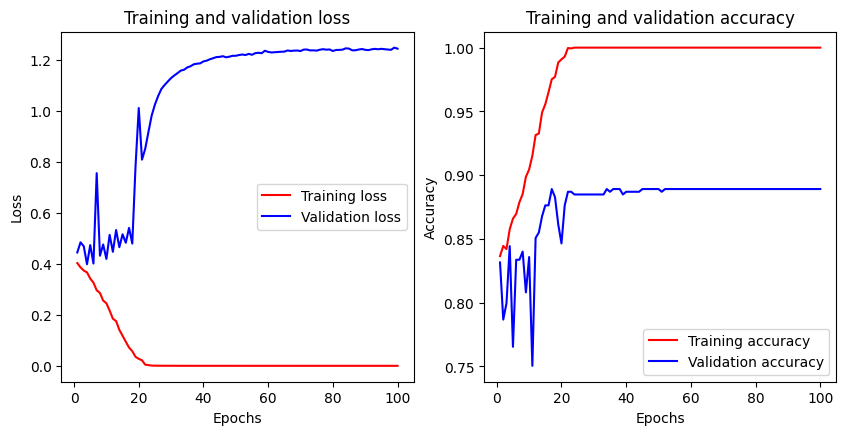

In [ ]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'b',label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,acc,'r',label='Training accuracy')
ax2.plot(epochs,val_acc,'b',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


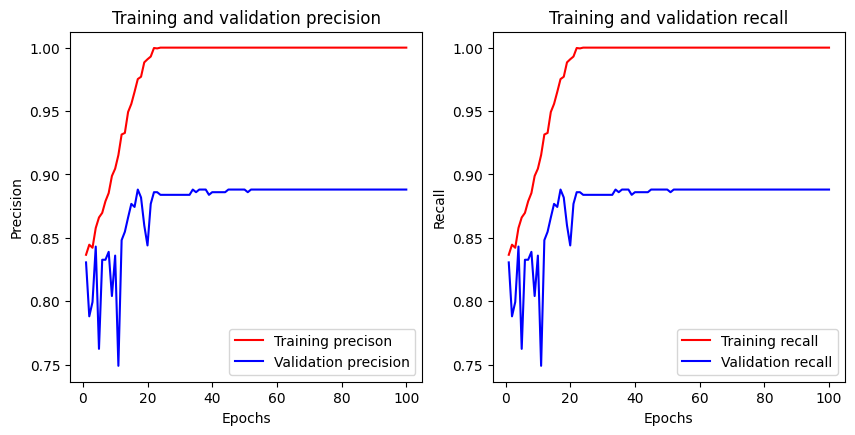

In [ ]:
import matplotlib.pyplot as plt
pre=history_dict['precision']
val_pre=history_dict['val_precision']
rec=history_dict['recall']
val_rec=history_dict['val_recall']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,pre,'r',label='Training precison')
ax1.plot(epochs,val_pre,'b',label='Validation precision')
ax1.set_title('Training and validation precision')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Precision')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,rec,'r',label='Training recall')
ax2.plot(epochs,val_rec,'b',label='Validation recall')
ax2.set_title('Training and validation recall')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Recall')
ax2.legend()

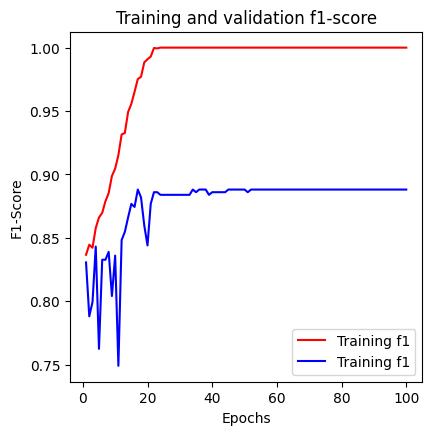

In [ ]:
import matplotlib.pyplot as plt
f1=history_dict['f1']
val_f1=history_dict['val_f1']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,f1,'r',label='Training f1')
ax1.plot(epochs,val_f1,'b',label='Training f1')
ax1.set_title('Training and validation f1-score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1-Score')
ax1.legend()


In [ ]:
# mura dataset

model.evaluate(test_ds)

16/16 [==============================] - 5s 235ms/step - loss: 5.3523 - accuracy: 0.4688 - precision: 0.4729 - recall: 0.4729 - f1: 0.4729


[5.35228157043457,
 0.46881720423698425,
 0.4729166626930237,
 0.4729166626930237,
 0.4729166328907013]

In [ ]:
# bone fracture dataset

model.evaluate(test_ds)

14/14 [==============================] - 6s 321ms/step - loss: 6.4280 - accuracy: 0.5038 - precision: 0.5008 - recall: 0.5008 - f1: 0.5008


[6.427980422973633,
 0.5037593841552734,
 0.5007936954498291,
 0.5007936954498291,
 0.5007936358451843]